In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
imdb = keras.datasets.imdb

In [5]:
# 下载数据，并且只保留常见的前2W个词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)

In [6]:
len(train_data)

25000

In [7]:
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [8]:
train_labels[:5]

array([1, 0, 0, 1, 0])

In [9]:
word_index = imdb.get_word_index()

In [10]:
len(word_index)

88584

In [11]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
r_word_index = {v:k for k,v in word_index.items()}

In [13]:
r_word_index[1]

'the'

In [14]:
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [16]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [17]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be 

In [18]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school dramatics class the sets are pathetic but marginally better than the <UNK> and the acting is wooden br br the infant <UNK> seems to have been stolen from the props cupboard of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [19]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [20]:
train_data

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

In [44]:
# 一共有2W词
vocab_size = 20000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 100))  # 用100维对词进行嵌入式表示
model.add(keras.layers.GlobalAveragePooling1D())  # 对每个词进行平均池化
#model.add(keras.layers.GlobalMaxPooling1D())  # 或者是最大池化
model.add(keras.layers.Dense(100, activation=tf.nn.relu))  # 通过全连接层
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))  # 通过全连接层得到最终的结果

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,010,201
Trainable params: 2,010,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
# 使用1W的数据作为验证集，其余的数据作为训练集
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 145us/step - loss: 0.6887 - acc: 0.6221 - val_loss: 0.6788 - val_acc: 0.7530
Epoch 2/40
15000/15000 [==============================] - 1s 99us/step - loss: 0.6470 - acc: 0.7581 - val_loss: 0.6039 - val_acc: 0.7892
Epoch 3/40
15000/15000 [==============================] - 1s 99us/step - loss: 0.5285 - acc: 0.8184 - val_loss: 0.4698 - val_acc: 0.8261
Epoch 4/40
15000/15000 [==============================] - 1s 99us/step - loss: 0.3857 - acc: 0.8697 - val_loss: 0.3652 - val_acc: 0.8624
Epoch 5/40
15000/15000 [==============================] - 1s 100us/step - loss: 0.2920 - acc: 0.8995 - val_loss: 0.3156 - val_acc: 0.8777
Epoch 6/40
15000/15000 [==============================] - 1s 99us/step - loss: 0.2327 - acc: 0.9188 - val_loss: 0.2925 - val_acc: 0.8821
Epoch 7/40
15000/15000 [==============================] - 1s 99us/step - loss: 0.1908 - acc: 0.9357 - val_loss: 0.2814 - val_a

In [48]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 54us/step
[0.6176278840708732, 0.857]


In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

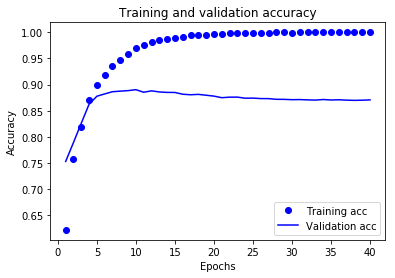

In [51]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
#每一Epochs都进行F1计算
import numpy as np
from keras.callbacks import Callback
from keras.engine.training import Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='weighted')
        _val_recall = recall_score(val_targ, val_predict,average='weighted')
        _val_precision = precision_score(val_targ, val_predict,average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print( ' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return
    
metrics = Metrics()

In [53]:
from keras.callbacks import EarlyStopping
earlystopping=keras.callbacks.EarlyStopping(monitor='val_acc', patience=8, verbose=0, mode='max')

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=90,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[metrics,earlystopping],
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/90
15000/15000 [==============================] - 2s 130us/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.5774 - val_acc: 0.8694
Epoch 2/90
15000/15000 [==============================] - 2s 127us/step - loss: 0.0027 - acc: 0.9999 - val_loss: 0.5844 - val_acc: 0.8692
Epoch 3/90
15000/15000 [==============================] - 2s 126us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.5902 - val_acc: 0.8688
Epoch 4/90
15000/15000 [==============================] - 2s 129us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.5959 - val_acc: 0.8697
Epoch 5/90
15000/15000 [==============================] - 2s 126us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6029 - val_acc: 0.8690
Epoch 6/90
15000/15000 [==============================] - 2s 129us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6086 - val_acc: 0.8687
Epoch 7/90
15000/15000 [==============================] - 2s 128us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6135 - 

In [56]:
model.evaluate(partial_x_train, partial_y_train)

15000/15000 [==============================] - 1s 54us/step


[0.0009017923107060294, 1.0]

In [57]:
model.evaluate(x_val, y_val)

10000/10000 [==============================] - 1s 54us/step


[0.6439755359441042, 0.8675]

In [58]:
model.evaluate(train_data, train_labels)

25000/25000 [==============================] - 1s 54us/step


[0.25813128976596517, 0.947]

In [59]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 54us/step


[0.6967365902328492, 0.85476]

In [81]:
# 一共有2W词
vocab_size = 20000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 100))  # 用100维对词进行嵌入式表示
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.LSTM(64))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.LSTM(32))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(keras.layers.MaxPooling1D(pool_size=2))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.GlobalAveragePooling1D())  # 对每个词进行平均池化
#model.add(keras.layers.GlobalMaxPooling1D())  # 或者是最大池化
# model.add(keras.layers.Dense(100, activation=tf.nn.relu))  # 通过全连接层
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))  # 通过全连接层得到最终的结果

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 100)         2000000   
_________________________________________________________________
lstm_18 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 2,080,501
Trainable params: 2,080,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 34s 2ms/step - loss: 0.6924 - acc: 0.5237 - val_loss: 0.6907 - val_acc: 0.5314
Epoch 2/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.6838 - acc: 0.5760 - val_loss: 0.6779 - val_acc: 0.5569
Epoch 3/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.6315 - acc: 0.6355 - val_loss: 0.6300 - val_acc: 0.7548
Epoch 4/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.6223 - acc: 0.6441 - val_loss: 0.6027 - val_acc: 0.7583
Epoch 5/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.4986 - acc: 0.7905 - val_loss: 0.5143 - val_acc: 0.7882
Epoch 6/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.4652 - acc: 0.8271 - val_loss: 1.4270 - val_acc: 0.6309
Epoch 7/20
15000/15000 [==============================] - 33s 2ms/step - loss: 1.2104 - acc: 0.5663 - val_loss: 0.7288 - val_acc